# Sentiment Analysis for Steam Reviews

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train.csv")#https://www.kaggle.com/datasets/piyushagni5/sentiment-analysis-for-steam-reviews?select=train.csv

In [3]:
df

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


In [8]:
df["user_suggestion"].value_counts()#1:positive,0:negative

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [10]:
df.isnull().sum() #We examine the empty lines.

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [19]:
df["user_review"]=df["user_review"].str.lower() #We convert our texts to lowercase.
df["user_review"]=df["user_review"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.
df["user_review"]=df["user_review"].str.replace("\d+","") #We are removing numbers from our texts.
df["user_review"]=df["user_review"].str.replace("\n","").replace("\r","") #We remove spaces in our texts.
df_positive=df[df['user_suggestion']==1]
df_negative=df[df['user_suggestion']==0]

In [14]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x=df.user_review
y=df.user_suggestion
x=vect.fit_transform(x)

In [15]:
def sentiment_classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    r=RandomForestClassifier()
    l=LogisticRegression()
    mb=MultinomialNB()
    
    algos=[k,d,r,l,mb]
    algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','MultinomialNB']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    sentiment_classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [16]:
sentiment_classification_funct(x,y)

(13995, 80419) (3499, 80419) (13995,) (3499,)


,f1_score,recall_score,precision_score,accuracy_score
LogisticRegression,0.860998,0.865847,0.856203,0.843955
MultinomialNB,0.852071,0.847926,0.856256,0.835667
RandomForestClassifier,0.838585,0.885817,0.796134,0.809660
DecisionTreeClassifier,0.721717,0.731695,0.712008,0.685053
KNeighborsClassifier,0.718387,0.903226,0.596349,0.604744


In [35]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("Steam.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")
#We draw the most used words in texts on a steam logo.

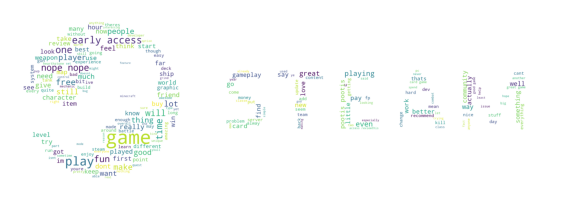

In [36]:
wc(df_positive.user_review,"white")##Positive

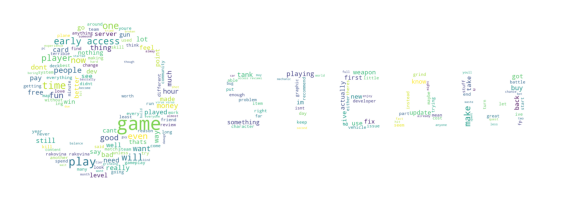

In [32]:
wc(df_negative.user_review,"white")##Negative

In [37]:
sent=df[["user_suggestion","user_review"]]

In [38]:
def detect_sentiment(user_review):
    return TextBlob(user_review).sentiment.polarity
#We are doing our sentiment analysis.

In [39]:
sent["sentiment"]=sent["user_review"].apply(detect_sentiment)
sent.head()

,user_suggestion,user_review,sentiment
0,1,im scared and hearing creepy voices so ill pa...,-0.080556
1,1,best game more better than sam peppers youtube...,0.228571
2,1,a littly iffy on the controls but once you kno...,0.011374
3,1,great game fun and colorful and all thata side...,0.214286
4,1,not many games have the cute tag right next to...,0.045408


In [40]:
def sentiment2(sent):
    if (sent< -0.02):
        return 3
    elif sent>0.02:
        return 1
    else:
        return 0
#We divide the texts into three groups positive, negative and nötr.

In [41]:
sent["sent"]=sent["sentiment"].apply(sentiment2)
sent.head()

,user_suggestion,user_review,sentiment,sent
0,1,im scared and hearing creepy voices so ill pa...,-0.080556,3
1,1,best game more better than sam peppers youtube...,0.228571,1
2,1,a littly iffy on the controls but once you kno...,0.011374,0
3,1,great game fun and colorful and all thata side...,0.214286,1
4,1,not many games have the cute tag right next to...,0.045408,1


In [43]:
sent.sentiment.value_counts()

 0.000000    221
 0.100000     59
 0.300000     51
-0.200000     48
 0.200000     46
            ... 
 0.254487      1
 0.237429      1
 0.280114      1
-0.047917      1
 0.211250      1
Name: sentiment, Length: 12655, dtype: int64